In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
import pandas as pd
import os
import requests
import shapely
import json
import io
from fiona.crs import from_epsg
import scipy as sp
from scipy import stats
import urllib
import requests
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import linear_model
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

 DATA COLLECTION AND DATA WRANGLING

In [3]:
#create the env variable if missing
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/ss12513/PUIdata


ACS 2016 data has been downloaded from American Fact Finder. The tables have been downloaded and moved to PUIDATA folder.

In [ ]:
!unzip ACS_16_5YR_S1902.zip

Archive:  ACS_16_5YR_S1902.zip
  inflating: ACS_16_5YR_S1902_with_ann.csv  
  inflating: ACS_16_5YR_S1902_metadata.csv  
  inflating: ACS_16_5YR_S1902.txt    
replace aff_download_readme_ann.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [182]:
!mv ACS_16_5YR_S1902_with_ann.csv  $PUIDATA
!mv ACS_16_5YR_S1902_metadata.csv  $PUIDATA
!mv ACS_16_5YR_S1902.txt $PUIDATA

In [4]:
acs2=pd.read_csv(os.getenv("PUIDATA") + "/ACS_16_5YR_S1902_with_ann.csv")
acs2.head()

,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC02,HC01_MOE_VC02,HC02_EST_VC02,HC02_MOE_VC02,HC01_EST_VC03,HC01_MOE_VC03,HC02_EST_VC03,...,HC02_EST_VC34,HC02_MOE_VC34,HC01_EST_VC35,HC01_MOE_VC35,HC02_EST_VC35,HC02_MOE_VC35,HC01_EST_VC36,HC01_MOE_VC36,HC02_EST_VC36,HC02_MOE_VC36
0,Id,Id2,Geography,Total; Estimate; All households,Total; Margin of Error; All households,Mean income (dollars); Estimate; All households,Mean income (dollars); Margin of Error; All ho...,Total; Estimate; All households - With earnings,Total; Margin of Error; All households - With ...,Mean income (dollars); Estimate; All household...,...,Mean income (dollars); Estimate; PERCENT ALLOC...,Mean income (dollars); Margin of Error; PERCEN...,Total; Estimate; PERCENT ALLOCATED - Family in...,Total; Margin of Error; PERCENT ALLOCATED - Fa...,Mean income (dollars); Estimate; PERCENT ALLOC...,Mean income (dollars); Margin of Error; PERCEN...,Total; Estimate; PERCENT ALLOCATED - Individua...,Total; Margin of Error; PERCENT ALLOCATED - In...,Mean income (dollars); Estimate; PERCENT ALLOC...,Mean income (dollars); Margin of Error; PERCEN...
1,8600000US06390,06390,ZCTA5 06390,118,54,168840,40455,86.4,18.2,110973,...,(X),(X),63.0,(X),(X),(X),28.2,(X),(X),(X)
2,8600000US07421,07421,ZCTA5 07421,2575,180,105681,9312,86.6,3.8,105021,...,(X),(X),43.4,(X),(X),(X),32.9,(X),(X),(X)
3,8600000US10001,10001,ZCTA5 10001,11967,548,162724,26868,81.6,2.8,172253,...,(X),(X),31.5,(X),(X),(X),20.3,(X),(X),(X)
4,8600000US10002,10002,ZCTA5 10002,33327,636,64196,2829,66.9,2.0,81504,...,(X),(X),36.1,(X),(X),(X),27.4,(X),(X),(X)


In [5]:
acs2=acs2[['GEO.id2','HC02_EST_VC02']]
acs2.head()

,GEO.id2,HC02_EST_VC02
0,Id2,Mean income (dollars); Estimate; All households
1,06390,168840
2,07421,105681
3,10001,162724
4,10002,64196


In [6]:
acs2.rename(columns={'GEO.id2':'ZIPCODE','HC02_EST_VC02':'Mean Income'},inplace=True)
acs2.drop(0,inplace=True)
acs2.head()

,ZIPCODE,Mean Income
1,06390,168840
2,07421,105681
3,10001,162724
4,10002,64196
5,10003,171737


In [9]:
!mv ACS_16_5YR_S0101_with_ann.csv  $PUIDATA
!mv ACS_16_5YR_S0101_metadata.csv  $PUIDATA
!mv ACS_16_5YR_S0101.txt $PUIDATA

mv: cannot stat 'ACS_16_5YR_S0101_with_ann.csv': No such file or directory
mv: cannot stat 'ACS_16_5YR_S0101_metadata.csv': No such file or directory
mv: cannot stat 'ACS_16_5YR_S0101.txt': No such file or directory


In [192]:
!mv ACS_16_5YR_B14002_with_ann.csv  $PUIDATA
!mv ACS_16_5YR_B14002_metadata.csv  $PUIDATA
!mv ACS_16_5YR_B14002.txt $PUIDATA

In [7]:
acs4=pd.read_csv(os.getenv("PUIDATA") + "/ACS_16_5YR_B14002_with_ann.csv")
acs4.head()

,GEO.id,GEO.id2,GEO.display-label,HD01_VD01,HD02_VD01,HD01_VD02,HD02_VD02,HD01_VD03,HD02_VD03,HD01_VD04,...,HD01_VD45,HD02_VD45,HD01_VD46,HD02_VD46,HD01_VD47,HD02_VD47,HD01_VD48,HD02_VD48,HD01_VD49,HD02_VD49
0,Id,Id2,Geography,Estimate; Total:,Margin of Error; Total:,Estimate; Male:,Margin of Error; Male:,Estimate; Male: - Enrolled in school:,Margin of Error; Male: - Enrolled in school:,Estimate; Male: - Enrolled in school: - Enroll...,...,Estimate; Female: - Enrolled in school: - Enro...,Margin of Error; Female: - Enrolled in school:...,Estimate; Female: - Enrolled in school: - Enro...,Margin of Error; Female: - Enrolled in school:...,Estimate; Female: - Enrolled in school: - Enro...,Margin of Error; Female: - Enrolled in school:...,Estimate; Female: - Enrolled in school: - Enro...,Margin of Error; Female: - Enrolled in school:...,Estimate; Female: - Not enrolled in school,Margin of Error; Female: - Not enrolled in school
1,8600000US06390,06390,ZCTA5 06390,301,151,171,86,53,50,2,...,17,23,0,11,0,11,0,11,105,66
2,8600000US07421,07421,ZCTA5 07421,7054,476,3671,317,760,140,113,...,110,69,10,15,10,15,0,17,2571,223
3,8600000US10001,10001,ZCTA5 10001,23003,1734,12013,983,1951,600,84,...,1101,269,352,136,66,44,286,136,7692,508
4,8600000US10002,10002,ZCTA5 10002,76431,2373,36912,1508,7216,808,600,...,868,230,792,186,289,124,503,149,32158,1163


In [8]:
acs4=acs4[['GEO.id2','HD01_VD03','HD01_VD27']]
acs4.head()

,GEO.id2,HD01_VD03,HD01_VD27
0,Id2,Estimate; Male: - Enrolled in school:,Estimate; Female: - Enrolled in school:
1,06390,53,25
2,07421,760,812
3,10001,1951,3298
4,10002,7216,7361


In [9]:
acs4.rename(columns={'GEO.id2':'ZIPCODE'},inplace=True)
acs4.drop(0,inplace=True)
acs4.head()

,ZIPCODE,HD01_VD03,HD01_VD27
1,06390,53,25
2,07421,760,812
3,10001,1951,3298
4,10002,7216,7361
5,10003,6511,8934


In [10]:
acs4['HD01_VD03']=acs4['HD01_VD03'].astype(int)
acs4['HD01_VD27']=acs4['HD01_VD27'].astype(int)

In [11]:
acs4['School_Enrollment']=acs4['HD01_VD03']+ acs4['HD01_VD27']

In [12]:
acs4.drop(['HD01_VD03','HD01_VD27'],axis=1,inplace=True)

In [13]:
acs4.head()

,ZIPCODE,School_Enrollment
1,06390,78
2,07421,1572
3,10001,5249
4,10002,14577
5,10003,15445


In [197]:
!mv ACS_16_5YR_S1501_with_ann.csv  $PUIDATA
!mv ACS_16_5YR_S1501_metadata.csv  $PUIDATA
!mv ACS_16_5YR_S1501.txt $PUIDATA

In [14]:
acs5=pd.read_csv(os.getenv("PUIDATA") + "/ACS_16_5YR_S1501_with_ann.csv")
acs5.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,3,4,7,8,11,12,15,16,19,20,23,24,27,28,31,32,35,36,39,40,43,44,47,48,51,52,55,56,59,60,63,64,67,68,71,72,75,76,79,80,83,84,87,88,91,92,95,96,99,100,103,104,107,108,111,112,115,116,119,120,123,124,127,128,131,132,135,136,139,140,143,144,147,148,151,152,155,156,183,184,187,188,191,192,195,196,199,200,203,204,207,208,211,212,215,216,219,220,223,224,227,228,231,232,235,236,239,240,243,244,247,248,251,252,255,256,259,260,263,264,267,268,271,272,275,276,279,280,283,284,287,288,291,292,295,296,299,300,303,304,307,308,311,312,315,316,319,320,323,324,327,328,331,332,335,336,339,340,343,344,347,348,351,352,355,356,359,360,363,364,367,368,371,372,375,376,379,380,383,384,387,388,391,392,395,396,399,400,403,404,407,408,411,412,415,416,419,420,423,424,427,428,431,432,435,436,439,440,443,444,447,448,451,452,455,456,459,460,463,464,467,468,471,472,475,476,479,480,

,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC02,HC01_MOE_VC02,HC02_EST_VC02,HC02_MOE_VC02,HC03_EST_VC02,HC03_MOE_VC02,HC04_EST_VC02,...,HC02_EST_VC85,HC02_MOE_VC85,HC03_EST_VC85,HC03_MOE_VC85,HC04_EST_VC85,HC04_MOE_VC85,HC05_EST_VC85,HC05_MOE_VC85,HC06_EST_VC85,HC06_MOE_VC85
0,Id,Id2,Geography,Total; Estimate; Population 18 to 24 years,Total; Margin of Error; Population 18 to 24 years,Percent; Estimate; Population 18 to 24 years,Percent; Margin of Error; Population 18 to 24 ...,Males; Estimate; Population 18 to 24 years,Males; Margin of Error; Population 18 to 24 years,Percent Males; Estimate; Population 18 to 24 y...,...,Percent; Estimate; MEDIAN EARNINGS IN THE PAST...,Percent; Margin of Error; MEDIAN EARNINGS IN T...,Males; Estimate; MEDIAN EARNINGS IN THE PAST 1...,Males; Margin of Error; MEDIAN EARNINGS IN THE...,Percent Males; Estimate; MEDIAN EARNINGS IN TH...,Percent Males; Margin of Error; MEDIAN EARNING...,Females; Estimate; MEDIAN EARNINGS IN THE PAST...,Females; Margin of Error; MEDIAN EARNINGS IN T...,Percent Females; Estimate; MEDIAN EARNINGS IN ...,Percent Females; Margin of Error; MEDIAN EARNI...
1,8600000US06390,06390,ZCTA5 06390,11,15,(X),(X),11,15,(X),...,(X),(X),-,**,(X),(X),-,**,(X),(X)
2,8600000US07421,07421,ZCTA5 07421,660,193,(X),(X),358,141,(X),...,(X),(X),91354,35494,(X),(X),62262,21885,(X),(X)
3,8600000US10001,10001,ZCTA5 10001,3377,567,(X),(X),1155,352,(X),...,(X),(X),113140,21037,(X),(X),87055,12356,(X),(X)
4,8600000US10002,10002,ZCTA5 10002,6640,733,(X),(X),3360,488,(X),...,(X),(X),92045,17095,(X),(X),64659,10747,(X),(X)


In [206]:
#pd.set_option('display.max_colwidth', -1)

In [15]:
acs5=acs5[['GEO.id2','HC01_EST_VC22','HC01_EST_VC26','HC01_EST_VC30','HC01_EST_VC34']]

In [16]:
acs5.head()

,GEO.id2,HC01_EST_VC22,HC01_EST_VC26,HC01_EST_VC30,HC01_EST_VC34
0,Id2,Total; Estimate; Population 25 to 34 years - B...,Total; Estimate; Population 35 to 44 years - B...,Total; Estimate; Population 45 to 64 years - B...,Total; Estimate; Population 65 years and over ...
1,06390,2,23,61,31
2,07421,242,283,744,154
3,10001,4375,2821,3175,1424
4,10002,8785,4655,4910,2258


In [17]:
acs5.rename(columns={'GEO.id2':'ZIPCODE'},inplace=True)
acs5.drop(0,inplace=True)
acs5.head()

,ZIPCODE,HC01_EST_VC22,HC01_EST_VC26,HC01_EST_VC30,HC01_EST_VC34
1,06390,2,23,61,31
2,07421,242,283,744,154
3,10001,4375,2821,3175,1424
4,10002,8785,4655,4910,2258
5,10003,13809,6567,7951,3958


In [18]:
acs5['HC01_EST_VC22']=acs5['HC01_EST_VC22'].astype(int)
acs5['HC01_EST_VC26']=acs5['HC01_EST_VC26'].astype(int)
acs5['HC01_EST_VC30']=acs5['HC01_EST_VC30'].astype(int)
acs5['HC01_EST_VC34']=acs5['HC01_EST_VC34'].astype(int)

In [19]:
acs5['bachelor_deg']=acs5['HC01_EST_VC22'] + acs5['HC01_EST_VC26'] + acs5['HC01_EST_VC30'] + acs5['HC01_EST_VC34']

In [20]:
acs5.drop(['HC01_EST_VC22', 'HC01_EST_VC26', 'HC01_EST_VC30','HC01_EST_VC34'],axis=1,inplace=True)

In [21]:
acs5.head()

,ZIPCODE,bachelor_deg
1,06390,117
2,07421,1423
3,10001,11795
4,10002,20608
5,10003,32285


In [308]:
!mv ACS_16_5YR_DP03_with_ann.csv  $PUIDATA
!mv ACS_16_5YR_DP03_metadata.csv  $PUIDATA
!mv ACS_16_5YR_DP03.txt $PUIDATA

In [22]:
acs6=pd.read_csv(os.getenv("PUIDATA") + "/ACS_16_5YR_DP03_with_ann.csv")
acs6.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,3,4,5,7,8,11,12,15,16,19,20,23,24,27,28,31,32,33,39,40,41,43,44,47,48,51,52,55,56,57,59,60,63,64,65,67,68,71,72,73,75,76,79,80,83,84,87,88,91,92,95,96,103,104,105,107,108,111,112,115,116,119,120,123,124,127,128,129,131,132,135,136,139,140,143,144,147,148,151,152,155,156,159,160,163,164,167,168,171,172,175,176,179,180,183,184,185,187,188,191,192,195,196,199,200,203,204,205,207,208,211,212,215,216,219,220,223,224,227,228,231,232,235,236,239,240,243,244,255,256,263,264,271,272,279,280,287,288,295,296,299,300,301,303,304,307,308,311,312,315,316,319,320,323,324,327,328,331,332,335,336,339,340,355,356,357,379,380,381,383,384,387,388,391,392,395,396,399,400,401,403,404,407,408,409,411,412,413,415,416,417,419,420,423,424,427,428,431,432,435,436,437,439,440,443,444,447,448,451,452,455,456,457,459,460,463,464,467,468,471,472) have mixed types. Specify dtype

,GEO.id,GEO.id2,GEO.display-label,HC01_VC03,HC02_VC03,HC03_VC03,HC04_VC03,HC01_VC04,HC02_VC04,HC03_VC04,...,HC03_VC178,HC04_VC178,HC01_VC179,HC02_VC179,HC03_VC179,HC04_VC179,HC01_VC180,HC02_VC180,HC03_VC180,HC04_VC180
0,Id,Id2,Geography,Estimate; EMPLOYMENT STATUS - Population 16 ye...,Margin of Error; EMPLOYMENT STATUS - Populatio...,Percent; EMPLOYMENT STATUS - Population 16 yea...,Percent Margin of Error; EMPLOYMENT STATUS - P...,Estimate; EMPLOYMENT STATUS - Population 16 ye...,Margin of Error; EMPLOYMENT STATUS - Populatio...,Percent; EMPLOYMENT STATUS - Population 16 yea...,...,Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error; PERCENTAGE OF FAMILIE...,Estimate; PERCENTAGE OF FAMILIES AND PEOPLE WH...,Margin of Error; PERCENTAGE OF FAMILIES AND PE...,Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error; PERCENTAGE OF FAMILIE...,Estimate; PERCENTAGE OF FAMILIES AND PEOPLE WH...,Margin of Error; PERCENTAGE OF FAMILIES AND PE...,Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error; PERCENTAGE OF FAMILIE...
1,8600000US06390,06390,ZCTA5 06390,251,122,251,(X),200,109,79.7,...,0.0,33.6,(X),(X),0.8,2.0,(X),(X),0.0,34.3
2,8600000US07421,07421,ZCTA5 07421,6052,447,6052,(X),4469,440,73.8,...,8.5,8.2,(X),(X),7.3,4.9,(X),(X),14.0,6.5
3,8600000US10001,10001,ZCTA5 10001,21038,1083,21038,(X),14899,827,70.8,...,12.7,5.1,(X),(X),17.9,12.3,(X),(X),17.2,2.9
4,8600000US10002,10002,ZCTA5 10002,68324,2130,68324,(X),38156,1629,55.8,...,33.0,3.7,(X),(X),26.9,3.5,(X),(X),29.9,2.7


In [23]:
acs6=acs6[['GEO.id2','HC01_VC06']]
acs6.head()

,GEO.id2,HC01_VC06
0,Id2,Estimate; EMPLOYMENT STATUS - Population 16 ye...
1,06390,178
2,07421,4043
3,10001,13870
4,10002,34748


In [24]:
acs6.rename(columns={'GEO.id2':'ZIPCODE','HC01_VC06':'Employed'},inplace=True)
acs6.drop(0,inplace=True)

Real Estate Sales have been taken from NYC Finance for the year 2016. There are separate files for each borough. The files have been merged in a single dataframe.

In [25]:
df=pd.read_excel("https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2016/2016_brooklyn.xls",header=4)

In [26]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,13,,A5,8665 15TH AVENUE,,...,1,0,1,1547,2224,1930,1,A5,0,2016-05-25
1,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6361,11,,A5,71 BAY 10TH STREET,,...,1,0,1,2900,1660,1930,1,A5,829000,2016-04-05
2,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6364,2,,A5,1649 BENSON AVENUE,,...,1,0,1,1638,972,1930,1,A5,0,2016-10-06
3,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6364,72,,A5,68 BAY 14TH STREET,,...,1,0,1,1950,972,1950,1,A5,790000,2016-06-21
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6371,79,,A5,8668 19TH AVENUE,,...,1,0,1,2223,2520,1930,1,A5,788000,2016-03-31


In [27]:
df.columns

Index(['BOROUGH\n', 'NEIGHBORHOOD\n', 'BUILDING CLASS CATEGORY\n',
       'TAX CLASS AT PRESENT\n', 'BLOCK\n', 'LOT\n', 'EASE-MENT\n',
       'BUILDING CLASS AT PRESENT\n', 'ADDRESS\n', 'APARTMENT NUMBER\n',
       'ZIP CODE\n', 'RESIDENTIAL UNITS\n', 'COMMERCIAL UNITS\n',
       'TOTAL UNITS\n', 'LAND SQUARE FEET\n', 'GROSS SQUARE FEET\n',
       'YEAR BUILT\n', 'TAX CLASS AT TIME OF SALE\n',
       'BUILDING CLASS AT TIME OF SALE\n', 'SALE PRICE\n', 'SALE DATE\n'],
      dtype='object')

In [28]:
df['BUILDING CLASS CATEGORY\n']=df['BUILDING CLASS CATEGORY\n'].str.strip()

In [29]:
# Filtering for residential sales only
li=['01  ONE FAMILY DWELLINGS','02  TWO FAMILY DWELLINGS', '03  THREE FAMILY DWELLINGS','04  TAX CLASS 1 CONDOS',
    '09  COOPS - WALKUP APARTMENTS','10  COOPS - ELEVATOR APARTMENTS','13  CONDOS - ELEVATOR APARTMENTS','12  CONDOS - WALKUP APARTMENTS'
   ]
ind=df['BUILDING CLASS CATEGORY\n'].isin(li)
df = df.loc[ind]
df['BUILDING CLASS CATEGORY\n'].unique()

array(['01  ONE FAMILY DWELLINGS', '02  TWO FAMILY DWELLINGS',
       '03  THREE FAMILY DWELLINGS', '04  TAX CLASS 1 CONDOS',
       '09  COOPS - WALKUP APARTMENTS', '10  COOPS - ELEVATOR APARTMENTS',
       '13  CONDOS - ELEVATOR APARTMENTS', '12  CONDOS - WALKUP APARTMENTS'], dtype=object)

In [30]:
df=df[['ZIP CODE\n','RESIDENTIAL UNITS\n','GROSS SQUARE FEET\n','SALE PRICE\n','LAND SQUARE FEET\n','BUILDING CLASS CATEGORY\n','YEAR BUILT\n']]


In [31]:
df2=pd.read_excel("https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2016/2016_manhattan.xls",header=4)

In [32]:
df2['BUILDING CLASS CATEGORY\n']=df2['BUILDING CLASS CATEGORY\n'].str.strip()
li=['01  ONE FAMILY DWELLINGS','02  TWO FAMILY DWELLINGS', '03  THREE FAMILY DWELLINGS','04  TAX CLASS 1 CONDOS',
    '09  COOPS - WALKUP APARTMENTS','10  COOPS - ELEVATOR APARTMENTS','13  CONDOS - ELEVATOR APARTMENTS','12  CONDOS - WALKUP APARTMENTS'
   ]
ind=df2['BUILDING CLASS CATEGORY\n'].isin(li)
df2 = df2.loc[ind]
df2['BUILDING CLASS CATEGORY\n'].unique()

array(['03  THREE FAMILY DWELLINGS', '09  COOPS - WALKUP APARTMENTS',
       '10  COOPS - ELEVATOR APARTMENTS', '12  CONDOS - WALKUP APARTMENTS',
       '13  CONDOS - ELEVATOR APARTMENTS', '01  ONE FAMILY DWELLINGS',
       '02  TWO FAMILY DWELLINGS', '04  TAX CLASS 1 CONDOS'], dtype=object)

In [33]:
df2=df2[['ZIP CODE\n','RESIDENTIAL UNITS\n','GROSS SQUARE FEET\n','SALE PRICE\n','LAND SQUARE FEET\n','BUILDING CLASS CATEGORY\n','YEAR BUILT\n']]

In [34]:
df3=pd.read_excel("https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2016/2016_bronx.xls",header=4)


In [35]:
df3['BUILDING CLASS CATEGORY\n']=df3['BUILDING CLASS CATEGORY\n'].str.strip()
li=['01  ONE FAMILY DWELLINGS','02  TWO FAMILY DWELLINGS', '03  THREE FAMILY DWELLINGS','04  TAX CLASS 1 CONDOS',
    '09  COOPS - WALKUP APARTMENTS','10  COOPS - ELEVATOR APARTMENTS','13  CONDOS - ELEVATOR APARTMENTS','12  CONDOS - WALKUP APARTMENTS'
   ]
ind=df3['BUILDING CLASS CATEGORY\n'].isin(li)
df3 = df3.loc[ind]
df3['BUILDING CLASS CATEGORY\n'].unique()

array(['01  ONE FAMILY DWELLINGS', '02  TWO FAMILY DWELLINGS',
       '03  THREE FAMILY DWELLINGS', '10  COOPS - ELEVATOR APARTMENTS',
       '04  TAX CLASS 1 CONDOS', '09  COOPS - WALKUP APARTMENTS',
       '12  CONDOS - WALKUP APARTMENTS', '13  CONDOS - ELEVATOR APARTMENTS'], dtype=object)

In [36]:
df3=df3[['ZIP CODE\n','RESIDENTIAL UNITS\n','GROSS SQUARE FEET\n','SALE PRICE\n','LAND SQUARE FEET\n','BUILDING CLASS CATEGORY\n','YEAR BUILT\n']]


In [37]:
df4=pd.read_excel("https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2016/2016_queens.xls",header=4)

In [38]:
df4['BUILDING CLASS CATEGORY\n']=df4['BUILDING CLASS CATEGORY\n'].str.strip()
li=['01  ONE FAMILY DWELLINGS','02  TWO FAMILY DWELLINGS', '03  THREE FAMILY DWELLINGS','04  TAX CLASS 1 CONDOS',
    '09  COOPS - WALKUP APARTMENTS','10  COOPS - ELEVATOR APARTMENTS','13  CONDOS - ELEVATOR APARTMENTS','12  CONDOS - WALKUP APARTMENTS'
   ]
ind=df4['BUILDING CLASS CATEGORY\n'].isin(li)
df4 = df4.loc[ind]
df4['BUILDING CLASS CATEGORY\n'].unique()

array(['01  ONE FAMILY DWELLINGS', '02  TWO FAMILY DWELLINGS',
       '03  THREE FAMILY DWELLINGS', '12  CONDOS - WALKUP APARTMENTS',
       '04  TAX CLASS 1 CONDOS', '09  COOPS - WALKUP APARTMENTS',
       '10  COOPS - ELEVATOR APARTMENTS',
       '13  CONDOS - ELEVATOR APARTMENTS'], dtype=object)

In [39]:
df4=df4[['ZIP CODE\n','RESIDENTIAL UNITS\n','GROSS SQUARE FEET\n','SALE PRICE\n','LAND SQUARE FEET\n','BUILDING CLASS CATEGORY\n','YEAR BUILT\n']]


In [40]:
df5=pd.read_excel("https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2016/2016_statenisland.xls",header=4)

In [41]:
df5['BUILDING CLASS CATEGORY\n']=df4['BUILDING CLASS CATEGORY\n'].str.strip()
li=['01  ONE FAMILY DWELLINGS','02  TWO FAMILY DWELLINGS', '03  THREE FAMILY DWELLINGS','04  TAX CLASS 1 CONDOS',
    '09  COOPS - WALKUP APARTMENTS','10  COOPS - ELEVATOR APARTMENTS','13  CONDOS - ELEVATOR APARTMENTS','12  CONDOS - WALKUP APARTMENTS'
   ]
ind=df5['BUILDING CLASS CATEGORY\n'].isin(li)
df5 = df5.loc[ind]
df5['BUILDING CLASS CATEGORY\n'].unique()

array(['01  ONE FAMILY DWELLINGS', '02  TWO FAMILY DWELLINGS',
       '03  THREE FAMILY DWELLINGS', '12  CONDOS - WALKUP APARTMENTS',
       '04  TAX CLASS 1 CONDOS', '09  COOPS - WALKUP APARTMENTS',
       '10  COOPS - ELEVATOR APARTMENTS',
       '13  CONDOS - ELEVATOR APARTMENTS'], dtype=object)

In [42]:
df5=df5[['ZIP CODE\n','RESIDENTIAL UNITS\n','GROSS SQUARE FEET\n','SALE PRICE\n','LAND SQUARE FEET\n','BUILDING CLASS CATEGORY\n','YEAR BUILT\n']]


In [43]:
re=pd.concat([df,df2,df3,df4,df5])
re.head()

,ZIP CODE,RESIDENTIAL UNITS,GROSS SQUARE FEET,SALE PRICE,LAND SQUARE FEET,BUILDING CLASS CATEGORY,YEAR BUILT
0,11228,1,2224,0,1547,01 ONE FAMILY DWELLINGS,1930
1,11228,1,1660,829000,2900,01 ONE FAMILY DWELLINGS,1930
2,11214,1,972,0,1638,01 ONE FAMILY DWELLINGS,1930
3,11214,1,972,790000,1950,01 ONE FAMILY DWELLINGS,1950
4,11214,1,2520,788000,2223,01 ONE FAMILY DWELLINGS,1930


In [44]:
re.shape

(70673, 7)

In [45]:
real=re.dropna()

In [46]:
#Filtering data to remove missing information.
ind=(real['SALE PRICE\n'] >0) & (real['ZIP CODE\n']>0) & (real['RESIDENTIAL UNITS\n']>0) & (real['GROSS SQUARE FEET\n']>500)
real=real.loc[ind]

In [47]:
real.head()

,ZIP CODE,RESIDENTIAL UNITS,GROSS SQUARE FEET,SALE PRICE,LAND SQUARE FEET,BUILDING CLASS CATEGORY,YEAR BUILT
1,11228,1,1660,829000,2900,01 ONE FAMILY DWELLINGS,1930
3,11214,1,972,790000,1950,01 ONE FAMILY DWELLINGS,1950
4,11214,1,2520,788000,2223,01 ONE FAMILY DWELLINGS,1930
5,11214,1,3240,1090000,1740,01 ONE FAMILY DWELLINGS,1925
7,11228,1,1836,920000,2469,01 ONE FAMILY DWELLINGS,1940


In [48]:
real.reset_index(inplace=True)

In [49]:
real.shape

(25181, 8)

In [50]:
real.drop(['index'], axis=1,inplace=True)
real.head()

,ZIP CODE,RESIDENTIAL UNITS,GROSS SQUARE FEET,SALE PRICE,LAND SQUARE FEET,BUILDING CLASS CATEGORY,YEAR BUILT
0,11228,1,1660,829000,2900,01 ONE FAMILY DWELLINGS,1930
1,11214,1,972,790000,1950,01 ONE FAMILY DWELLINGS,1950
2,11214,1,2520,788000,2223,01 ONE FAMILY DWELLINGS,1930
3,11214,1,3240,1090000,1740,01 ONE FAMILY DWELLINGS,1925
4,11228,1,1836,920000,2469,01 ONE FAMILY DWELLINGS,1940


In [51]:
# Factorizing the Buiding Class category to a categorical variable.
labels, uniques = pd.factorize(real['BUILDING CLASS CATEGORY\n'])
labels

array([0, 0, 0, ..., 4, 4, 4])

In [52]:
real['building class']=labels
real['building class'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [53]:
real.drop(['BUILDING CLASS CATEGORY\n'], axis=1,inplace=True)
real.head()

,ZIP CODE,RESIDENTIAL UNITS,GROSS SQUARE FEET,SALE PRICE,LAND SQUARE FEET,YEAR BUILT,building class
0,11228,1,1660,829000,2900,1930,0
1,11214,1,972,790000,1950,1950,0
2,11214,1,2520,788000,2223,1930,0
3,11214,1,3240,1090000,1740,1925,0
4,11228,1,1836,920000,2469,1940,0


In [54]:
# Dwonloding zipcode shape file with polygon geometry.
import urllib.request
urllib.request.urlretrieve("https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip", "file.gz")

('file.gz', <http.client.HTTPMessage at 0x7f4fddfbd320>)

In [54]:
!unzip file.gz

Archive:  file.gz
  inflating: ZIP_CODE_040114.shx     
  inflating: ZIP_CODE_040114.dbf     
  inflating: ZIP_CODE_040114.prj     
  inflating: ZIP_CODE_040114.sbn     
  inflating: ZIP_CODE_040114.sbx     
  inflating: ZIP_CODE_040114.shp     
  inflating: ZIP_CODE_040114.shp.xml  


In [266]:
!mv ZIP_CODE_040114.shx $PUIDATA
!mv ZIP_CODE_040114.dbf $PUIDATA
!mv ZIP_CODE_040114.prj $PUIDATA
!mv ZIP_CODE_040114.sbn $PUIDATA
!mv ZIP_CODE_040114.sbx $PUIDATA
!mv ZIP_CODE_040114.shp $PUIDATA
!mv ZIP_CODE_040114.shp.xml $PUIDATA

In [55]:
zipcode=gpd.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/ZIP_CODE_040114.shp")
zipcode.head(2)

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."


In [56]:
zipcode=zipcode[['ZIPCODE','geometry','PO_NAME','POPULATION']]
zipcode.head()

,ZIPCODE,geometry,PO_NAME,POPULATION
0,11436,"POLYGON ((1038098.251871482 188138.3800067157,...",Jamaica,18681.0
1,11213,"POLYGON ((1001613.712964058 186926.4395172149,...",Brooklyn,62426.0
2,11212,"POLYGON ((1011174.275535807 183696.33770971, 1...",Brooklyn,83866.0
3,11225,"POLYGON ((995908.3654508889 183617.6128015518,...",Brooklyn,56527.0
4,11218,"POLYGON ((991997.1134308875 176307.4958601296,...",Brooklyn,72280.0


In [57]:
real['ZIPCODE']=real['ZIP CODE\n']

Merging of zipcode,real estate and acs data is done on the zipcode column.

In [58]:
real['ZIPCODE']=real['ZIPCODE'].astype(int)
zipcode['ZIPCODE']=zipcode['ZIPCODE'].astype(int)

In [59]:
zips=zipcode.merge(real,left_on="ZIPCODE",right_on="ZIPCODE")
zips.head()

,ZIPCODE,geometry,PO_NAME,POPULATION,ZIP CODE,RESIDENTIAL UNITS,GROSS SQUARE FEET,SALE PRICE,LAND SQUARE FEET,YEAR BUILT,building class
0,11436,"POLYGON ((1038098.251871482 188138.3800067157,...",Jamaica,18681.0,11436,1,1568,462000,2500,1920,0
1,11436,"POLYGON ((1038098.251871482 188138.3800067157,...",Jamaica,18681.0,11436,1,868,380000,2000,1920,0
2,11436,"POLYGON ((1038098.251871482 188138.3800067157,...",Jamaica,18681.0,11436,1,1280,460000,2300,1920,0
3,11436,"POLYGON ((1038098.251871482 188138.3800067157,...",Jamaica,18681.0,11436,1,1120,403000,2000,1920,0
4,11436,"POLYGON ((1038098.251871482 188138.3800067157,...",Jamaica,18681.0,11436,1,1120,207000,2000,1920,0


In [60]:
zips['ZIPCODE']=zips['ZIPCODE'].astype(int)
acs2['ZIPCODE']=acs2['ZIPCODE'].astype(int)
mer=zips.merge(acs2,left_on='ZIPCODE',right_on='ZIPCODE',how='inner')

In [61]:
zips['ZIPCODE']=zips['ZIPCODE'].astype(int)
acs6['ZIPCODE']=acs6['ZIPCODE'].astype(int)
mer=mer.merge(acs6,left_on='ZIPCODE',right_on='ZIPCODE',how='inner')


In [62]:
zips['ZIPCODE']=zips['ZIPCODE'].astype(int)
acs4['ZIPCODE']=acs4['ZIPCODE'].astype(int)
mer=mer.merge(acs4,left_on='ZIPCODE',right_on='ZIPCODE',how='inner')


In [63]:
zips['ZIPCODE']=zips['ZIPCODE'].astype(int)
acs5['ZIPCODE']=acs5['ZIPCODE'].astype(int)
mer=mer.merge(acs5,left_on='ZIPCODE',right_on='ZIPCODE',how='inner')

In [64]:
mer.head()

,ZIPCODE,geometry,PO_NAME,POPULATION,ZIP CODE,RESIDENTIAL UNITS,GROSS SQUARE FEET,SALE PRICE,LAND SQUARE FEET,YEAR BUILT,building class,Mean Income,Employed,School_Enrollment,bachelor_deg
0,11436,"POLYGON ((1038098.251871482 188138.3800067157,...",Jamaica,18681.0,11436,1,1568,462000,2500,1920,0,80464,9420,5501,2388
1,11436,"POLYGON ((1038098.251871482 188138.3800067157,...",Jamaica,18681.0,11436,1,868,380000,2000,1920,0,80464,9420,5501,2388
2,11436,"POLYGON ((1038098.251871482 188138.3800067157,...",Jamaica,18681.0,11436,1,1280,460000,2300,1920,0,80464,9420,5501,2388
3,11436,"POLYGON ((1038098.251871482 188138.3800067157,...",Jamaica,18681.0,11436,1,1120,403000,2000,1920,0,80464,9420,5501,2388
4,11436,"POLYGON ((1038098.251871482 188138.3800067157,...",Jamaica,18681.0,11436,1,1120,207000,2000,1920,0,80464,9420,5501,2388


In [65]:
mer.columns

Index(['ZIPCODE', 'geometry', 'PO_NAME', 'POPULATION', 'ZIP CODE\n',
       'RESIDENTIAL UNITS\n', 'GROSS SQUARE FEET\n', 'SALE PRICE\n',
       'LAND SQUARE FEET\n', 'YEAR BUILT\n', 'building class', 'Mean Income',
       'Employed', 'School_Enrollment', 'bachelor_deg'],
      dtype='object')

In [66]:
mer=mer.rename(columns={'RESIDENTIAL UNITS\n':'RESIDENTIAL UNITS','GROSS SQUARE FEET\n':'GROSS SQUARE FEET','SALE PRICE\n':'SALE PRICE','LAND SQUARE FEET\n':'LAND SQUARE FEET','YEAR BUILT\n':'YEAR BUILT'})

In [67]:
mer.columns

Index(['ZIPCODE', 'geometry', 'PO_NAME', 'POPULATION', 'ZIP CODE\n',
       'RESIDENTIAL UNITS', 'GROSS SQUARE FEET', 'SALE PRICE',
       'LAND SQUARE FEET', 'YEAR BUILT', 'building class', 'Mean Income',
       'Employed', 'School_Enrollment', 'bachelor_deg'],
      dtype='object')

In [68]:
#Coverting the data type to int
columns=['RESIDENTIAL UNITS', 'GROSS SQUARE FEET','Mean Income','Employed','SALE PRICE','School_Enrollment','LAND SQUARE FEET','bachelor_deg','YEAR BUILT']
for c in columns:
    mer[c]=mer[c].astype(int)

In [69]:
ind=(mer['SALE PRICE'] >10000) & (mer['YEAR BUILT']>0)
#df=df.loc[ind]
mer=mer.loc[ind]
mer.shape

(24836, 15)

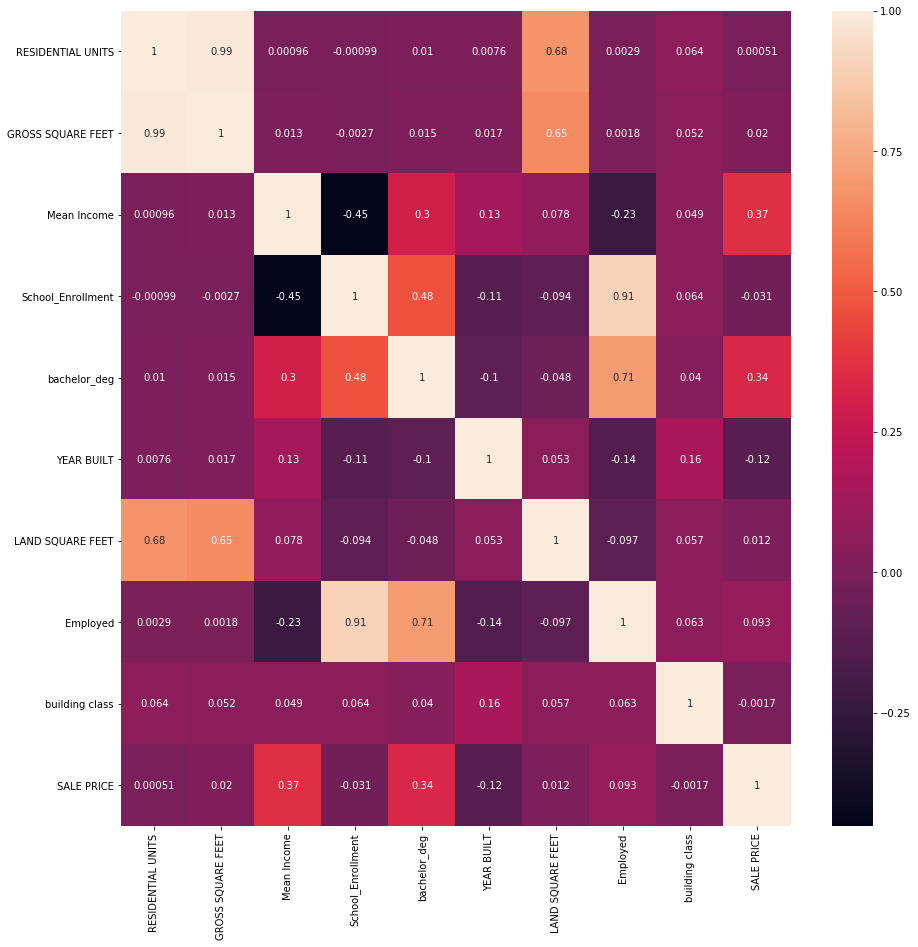

In [70]:
plt.figure(figsize=(15,15))
sbn.heatmap(mer[['RESIDENTIAL UNITS', 'GROSS SQUARE FEET','Mean Income','School_Enrollment','bachelor_deg','YEAR BUILT','LAND SQUARE FEET','Employed','building class','SALE PRICE']].corr(), annot=True)

Figure 1: The correlation matrix of features that are to be a part of the analysis has been plotted as a heat map.There is a high correlation between gross square feet and residential units. There is also a strong correlation between number of employed people and school enrollment. This will affect the feature importance of the models.

MODELLING SALES PRICE USING RANDOM FOREST

In [71]:
X=mer[['RESIDENTIAL UNITS', 'GROSS SQUARE FEET','Mean Income','School_Enrollment','bachelor_deg','YEAR BUILT','LAND SQUARE FEET','Employed','building class']]
Y=mer[['SALE PRICE']]

In [72]:
from sklearn import preprocessing
XS=preprocessing.scale(X)
XS=pd.DataFrame(XS,X.index,columns=X.columns.tolist())

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


In [73]:
np.random.seed(0)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(XS,Y,test_size=0.2,random_state=0) 

In [75]:
forest_reg = RandomForestRegressor(n_estimators=100,random_state=42)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_train)
y_pred1 = forest_reg.predict(X_test)
print('Random Forest train R squared: %.4f' % r2_score(y_pred,y_train))
print('Random Forest test R squared: %.4f' %r2_score(y_pred1,y_test))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest train R squared: 0.9369
Random Forest test R squared: 0.6701


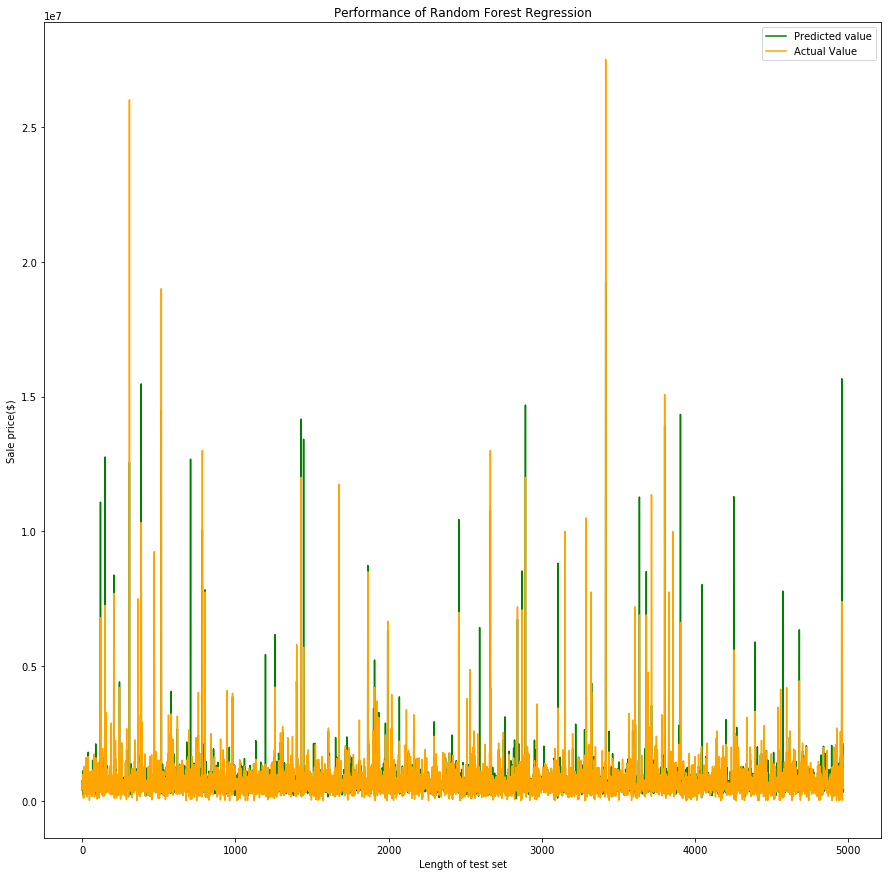

In [76]:
plt.figure(figsize=(15,15))
plt.plot(range(len(y_pred1)), y_pred1, color='g',label='Predicted value')
plt.plot(range(len(y_pred1)), y_test, color='orange',label='Actual Value')
plt.xlabel('Length of test set')
plt.ylabel('Sale price($)')
plt.title('Performance of Random Forest Regression')
plt.legend()
plt.savefig('RF.png')
plt.show()

Figure 2: The plot shows the actual sales price and the predicted sales price in the test set. From the graph it can be seen that the model does not perform well on higher values of the sales price.

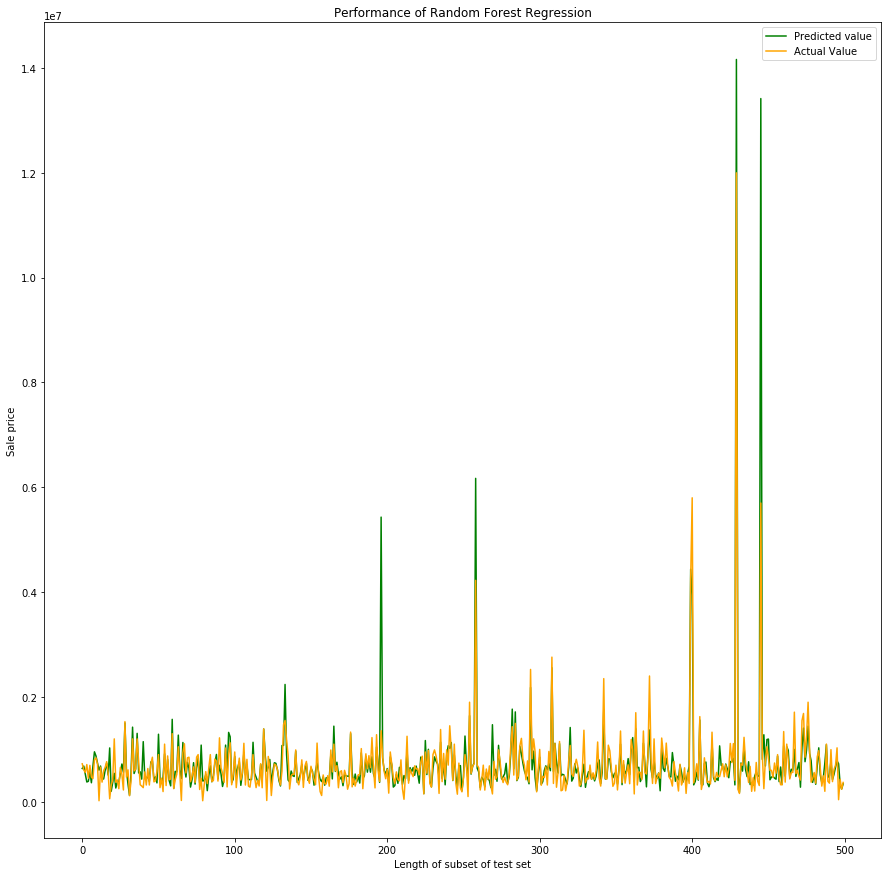

In [77]:
plt.figure(figsize=(15,15))
plt.plot(range(len(y_pred1[1000:1500])), y_pred1[1000:1500], color='g',label='Predicted value')
plt.plot(range(len(y_pred1[1000:1500])), y_test[1000:1500], color='orange',label='Actual Value')
plt.xlabel('Length of subset of test set')
plt.ylabel('Sale price')
plt.title('Performance of Random Forest Regression')
plt.legend()
plt.savefig('RFzoomed.png')
plt.show()

Figure 3: The plot shows the actual sales price and the predicted sales price in the test set.This figure shows a zoomed in version of the above graph.

In [78]:
import pandas as pd
feature_importances = pd.DataFrame(forest_reg.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Mean Income,0.488351
GROSS SQUARE FEET,0.187737
LAND SQUARE FEET,0.112650
bachelor_deg,0.056767
YEAR BUILT,0.051173
School_Enrollment,0.042020
Employed,0.028445
RESIDENTIAL UNITS,0.018255
building class,0.014602


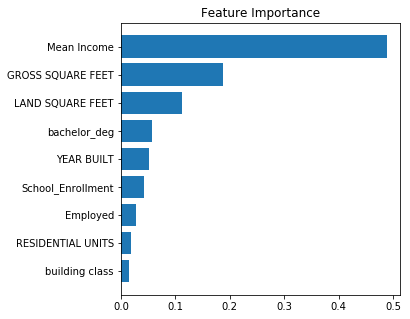

In [79]:
values, names = zip(*sorted(zip(forest_reg.feature_importances_, X.columns)))
plt.figure(figsize=(5,5))
plt.title("Feature Importance")
plt.barh(range(len(names)), values, align='center')
plt.yticks(range(len(names)), names);
plt.savefig('RFFeatureImportance.png')

Figure 4:Feature importance for Random Forest Model. The mean income is the most important feature in predicting the house value.

MODELLING SALES PRICE USING GRADIENT BOOSTING 

In [80]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor(n_estimators=100,random_state=42)
model.fit(X_train, y_train)
y_pred2 = model.predict(X_train)
y_pred3 = model.predict(X_test)
print('Random Forest train R squared: %.4f' % r2_score(y_pred2,y_train))
print('Random Forest test R squared: %.4f' %r2_score(y_pred3,y_test))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Random Forest train R squared: 0.6892
Random Forest test R squared: 0.5540


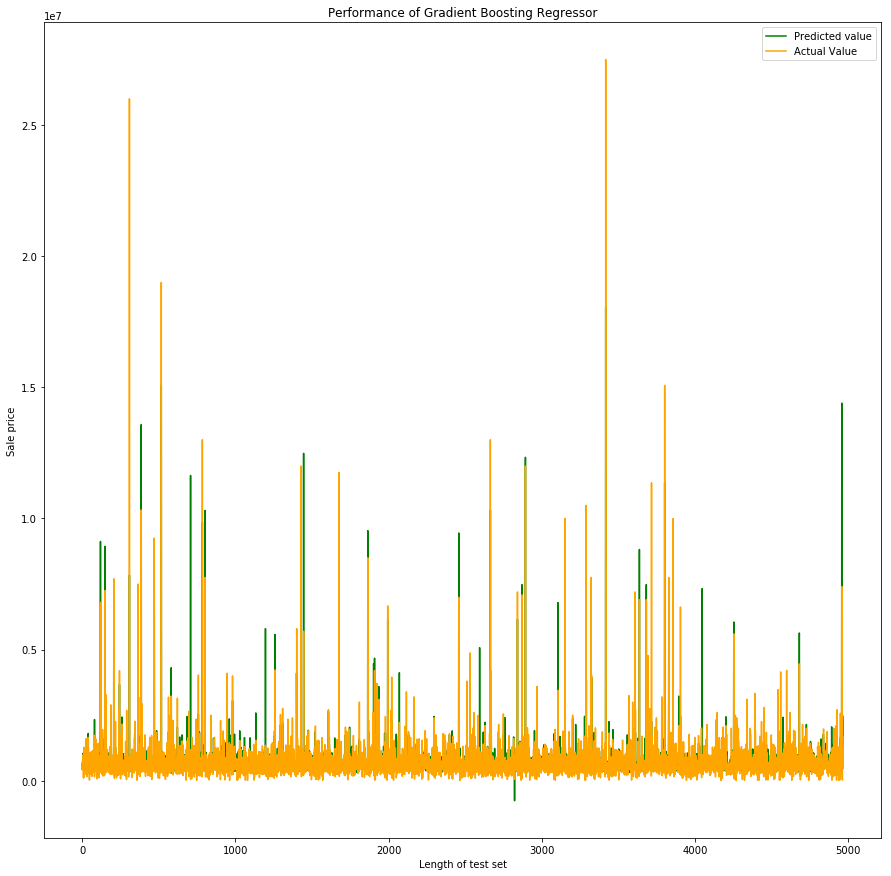

In [81]:
plt.figure(figsize=(15,15))
plt.plot(range(len(y_pred3)), y_pred3, color='g',label='Predicted value')
plt.plot(range(len(y_pred3)), y_test, color='orange',label='Actual Value')
plt.xlabel('Length of test set')
plt.ylabel('Sale price')
plt.title('Performance of Gradient Boosting Regressor')
plt.legend()
plt.savefig('GB.png')
plt.show()

Figure 5: The plot shows the actual sales price and the predicted sales price in the test set. From the graph it can be seen that the model does not perform well on higher values of the sales price.

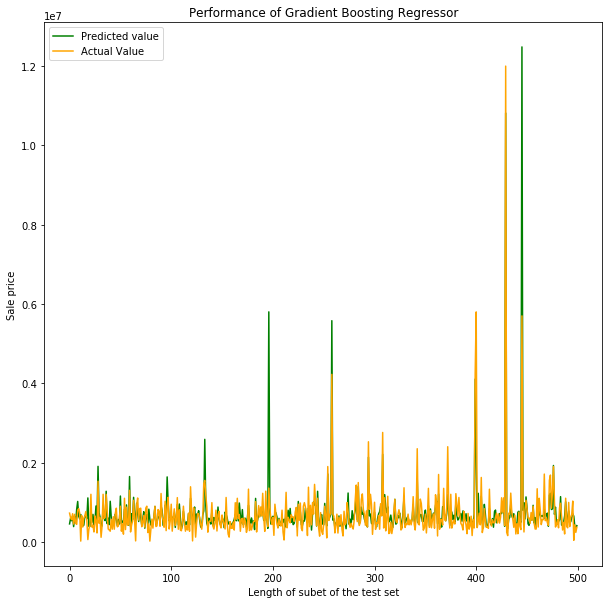

In [82]:
plt.figure(figsize=(10,10))
plt.plot(range(len(y_pred3[1000:1500])), y_pred3[1000:1500], color='g',label='Predicted value')
plt.plot(range(len(y_pred3[1000:1500])), y_test[1000:1500], color='orange',label='Actual Value')
plt.xlabel('Length of subet of the test set')
plt.ylabel('Sale price')
plt.title('Performance of Gradient Boosting Regressor')
plt.legend()
plt.savefig('GBzoomed.png')
plt.show()

Figure 6: The plot shows the actual sales price and the predicted sales price in the test set.This graph is a zoomed in version of the graph above for Gradient Boosting.

In [83]:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Mean Income,0.577371
GROSS SQUARE FEET,0.185254
bachelor_deg,0.071476
LAND SQUARE FEET,0.051210
School_Enrollment,0.039943
RESIDENTIAL UNITS,0.022597
YEAR BUILT,0.019217
Employed,0.017391
building class,0.015540


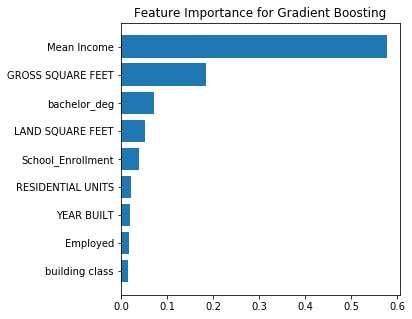

In [84]:
values, names = zip(*sorted(zip(model.feature_importances_, X.columns)))
plt.figure(figsize=(5,5))
plt.barh(range(len(names)), values, align='center')
plt.yticks(range(len(names)), names);
plt.title("Feature Importance for Gradient Boosting")
plt.savefig('GBFeatureImportance.png')

Figure 7: The fetaure importance for the gradient boosting model.

In [85]:
actual = y_test['SALE PRICE'].tolist()

In [86]:
predictions=pd.DataFrame({'Actual':actual, 'random_pred':y_pred1,'boosting_pred':y_pred3})
predictions.head()

,Actual,boosting_pred,random_pred
0,438000,434489.531803,389186.326667
1,720000,642454.075625,761378.266667
2,430000,539822.349708,508282.626667
3,775000,783038.346336,802063.076667
4,700000,460684.217543,238873.593333
